## Model Training
#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:


# Read the CSV files
df1 = pd.read_csv(r"C:\Data science\calorie count\calories (1).csv")
df2 = pd.read_csv(r"C:\Data science\calorie count\exercise.csv")


df2['Calories'] = df1['Calories']
df2.head()
df2.tail()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


#### Preparing X and Y variables

In [3]:
X = df2.drop(columns=['Calories', 'User_ID'])
y = df2['Calories']
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
 #Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [5]:
X = preprocessor.fit_transform(X)
X.shape


(15000, 8)

In [6]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12000, 8), (3000, 8))

#### Create an Evaluate Function to give all metrics after model Training

In [7]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 11.2670
- Mean Absolute Error: 8.3068
- R2 Score: 0.9672
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.4889
- Mean Absolute Error: 8.4415
- R2 Score: 0.9673


Lasso
Model performance for Training set
- Root Mean Squared Error: 12.2544
- Mean Absolute Error: 9.0122
- R2 Score: 0.9612
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12.5656
- Mean Absolute Error: 9.1473
- R2 Score: 0.9609


Ridge
Model performance for Training set
- Root Mean Squared Error: 11.2670
- Mean Absolute Error: 8.3065
- R2 Score: 0.9672
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.4892
- Mean Absolute Error: 8.4412
- R2 Score: 0.9673


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.2876
- Mean Absolute Error: 3.1157
- R2 Score: 0.9952
-----------------

In [9]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.999883
6,XGBRegressor,0.998868
5,Random Forest Regressor,0.998277
3,K-Neighbors Regressor,0.993511
4,Decision Tree,0.993133
0,Linear Regression,0.967294
2,Ridge,0.967292
8,AdaBoost Regressor,0.966026
1,Lasso,0.960876


In [10]:
# Step 1: Initialize CatBoost Regressor
cat_model = CatBoostRegressor(verbose=0)

# Step 2: Define hyperparameter search space
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'iterations': [200, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 1, 2, 3]
}

# Step 3: Perform randomized search
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=10,                # Try 10 combinations
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit on training data
random_search.fit(X_train, y_train)

# Step 5: Predict and evaluate
best_cat_model = random_search.best_estimator_
y_pred = best_cat_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100

print("Best Parameters:", random_search.best_params_)
print("Accuracy of the CatBoost model is %.2f%%" % score)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 10, 'bagging_temperature': 3}
Accuracy of the CatBoost model is 99.98%


In [11]:
from catboost import Pool
best_cat_model.get_feature_importance(prettified=True)


,Feature Id,Importances
0,5,47.542335
1,6,21.926340
2,2,16.627776
3,7,7.290454
4,1,3.558451
5,0,1.309271
6,4,1.206255
7,3,0.539117


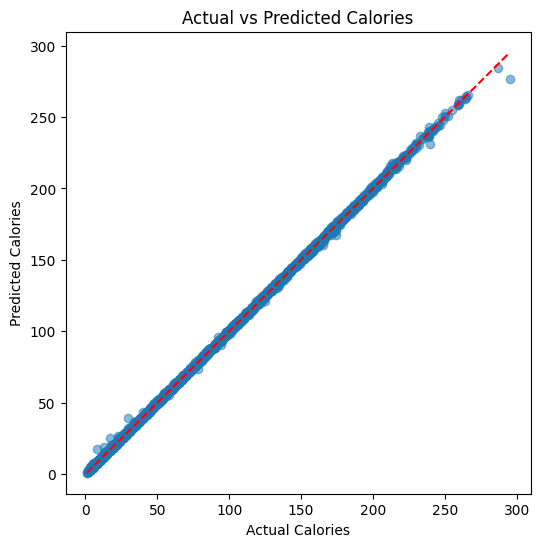

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()


#### Difference between Actual and Predicted Values

In [13]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
11499,173.0,172.182287,0.817713
6475,189.0,188.533036,0.466964
13167,53.0,54.026397,-1.026397
862,161.0,159.857588,1.142412
5970,226.0,225.362562,0.637438
...,...,...,...
6216,186.0,186.344229,-0.344229
3585,53.0,53.224868,-0.224868
10023,120.0,119.472988,0.527012
14044,20.0,20.592072,-0.592072
